**Importing essential libraries**

In [1]:
# initiating gpu using tensorflow.
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.compat.v1.Session(config=config)
set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



In [2]:
#installing keras-contrib for instance normalisation
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-mprd5mny
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-mprd5mny
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=1128b2f8c221870ed527b0d022cbd2ffbcab9a08083771e74a699ff20308af3d
  Stored in directory: /tmp/pip-ephem-wheel-cache-2kvhic5r/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib


In [3]:
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
# define layer
layer = InstanceNormalization(axis=-1)

In [4]:
#importing neccessary libraries

import zipfile
import os
import numpy as np
import shutil
import glob
from matplotlib import pyplot as plt
from random import sample
from random import random
from numpy.random import randint
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from keras.models import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
#from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

# preparing the dataset
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

**Setting the seeds for reproducibility**

In [5]:
#Setting random seeds for reproducibility
import random
random.seed(42)
np.random.seed(42)

**Mounting the google drive to access the zip file**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#extracting zipped image files into directory

## Unzipping catsNdogs.zip file
!unzip "/content/drive/MyDrive/catsNdogs.zip"
print('catsNdogs faces dataset extracted to working directory as "catsNdogs"')

## Unzipping PubFig.zip file
!unzip "/content/drive/MyDrive/PubFig.zip"
print('Public figure faces dataset extracted to working directory as "CelebDataProcessed/"\n')

Streaming output truncated to the last 5000 lines.
  inflating: CelebDataProcessed/Lindsay Lohan/29.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/290.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/292.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/293.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/294.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/295.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/296.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/297.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/298.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/299.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/3.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/30.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/300.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/301.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/302.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/303.jpg  
  inflating: CelebDataProcessed/Lindsay Lohan/304.jpg  
 

**Data Preprocessing**

**Extracting the files into single directory**

In [ ]:
#renaming files in celeb data to be random unique names (so they can all reside in the same directory)
for root, dirs, files in os.walk('CelebDataProcessed/'):
    for name in files:
        newname = str(np.random.choice(range(1,17000))) + name
        os.rename(os.path.join(root,name), os.path.join(root,newname))

## moving all images out of labelled subdirectory and into the main folder
folder = r"CelebDataProcessed/" #defining folder to search
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()] #defining subfolders
#looping through folders to move images
for sub in subfolders:
    for f in os.listdir(sub):
        src = os.path.join(sub, f)
        dst = os.path.join(folder, f)
        shutil.move(src, dst)

#deleting empty folders
path_abs=('CelebDataProcessed/') #defining path for empty folders
walk = list(os.walk(path_abs))
for path, _, _ in walk[::-1]:
    if len(os.listdir(path)) == 0:
        os.rmdir(path)

catsNdogs datset have subfolder so the below code is run two time, first time when the code is run it remove top subfolders and in the second run all the images are stored in single folder

In [ ]:
#renaming files in catsNdogs to be random unique names (so they can all reside in the same directory)
folder=['catsNdogs/','catsNdogs/']
for fold in folder:
  for root, dirs, files in os.walk(fold):
      for name in files:
          newname = str(np.random.choice(range(1,17000))) + name
          os.rename(os.path.join(root,name), os.path.join(root,newname))

  ## moving all images out of labelled subdirectory and into the main folder
  folder = r"catsNdogs/" #defining folder to search
  subfolders = [f.path for f in os.scandir(folder) if f.is_dir()] #defining subfolders
  #looping through folders to move images
  for sub in subfolders:
      for f in os.listdir(sub):
          src = os.path.join(sub, f)
          dst = os.path.join(folder, f)
          shutil.move(src, dst)

  #deleting empty folders
  path_abs=('catsNdogs/') #defining path for empty folders
  walk = list(os.walk(path_abs))
  for path, _, _ in walk[::-1]:
      if len(os.listdir(path)) == 0:
          os.rmdir(path)

Removing the files which are not jpg format

In [ ]:
import glob
removing_files = glob.glob('/content/catsNdogs/*.db')
for i in removing_files:
    os.remove(i)

In [ ]:
#Printing image counts
celeb_image_count = len(os.listdir('CelebDataProcessed/'))
catsNdogs_image_count = len(os.listdir('catsNdogs/'))
print(f'There are {celeb_image_count} images of celebrity faces (source)')
print(f'There are {catsNdogs_image_count} images of catsNdogs faces (target)')

There are 11600 images of celebrity faces (source)
There are 68076 images of catsNdogs faces (target)


**Selecting 10000 images form celebrity dataset and 12500 images catsNdogs dataset**

In [ ]:
to_be_removed = sample(glob.glob("/content/CelebDataProcessed/*.jpg"),1600)
for i in to_be_removed:
    os.remove(i)

In [ ]:
to_be_removed = sample(glob.glob("/content/catsNdogs/*.jpg"), 55576)
for i in to_be_removed:
    os.remove(i)

In [ ]:
#Printing image counts
celeb_image_count = len(os.listdir('CelebDataProcessed/'))
catsNdogs_image_count = len(os.listdir('catsNdogs/'))
print(f'There are {celeb_image_count} images of celebrity faces (source)')
print(f'There are {catsNdogs_image_count} images of catsNdogs faces (target)')

There are 10000 images of celebrity faces (source)
There are 12500 images of catsNdogs faces (target)


**Image Preprocessing**

The images are then processed as numpy arrays. The catsNdogs images are forced into 100x100 arrays and then sliced down into 128x128 arrays in a way that frames the face in a similar fashion to the celeb faces. Some resolution is sacraficed here but it proved worth it as this seemed to produce much better results than training on the original images.

In [ ]:
# load all images in a directory into memory
from PIL import Image
def load_images(path, size=(128,128)):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)

In [ ]:
dataA1 = load_images('CelebDataProcessed/')
dataB1 = load_images('catsNdogs/')

In [ ]:
print('Loaded dataA1: ', dataA1.shape)
print('Loaded dataB1: ', dataB1.shape)
# save as compressed numpy array
filename = 'celeb_catsNdogs_128.npz'
savez_compressed(filename, dataA1, dataB1)
print('Saved dataset: ', filename)

Loaded dataA1:  (10000, 128, 128, 3)
Loaded dataB1:  (12500, 128, 128, 3)
Saved dataset:  celeb_catsNdogs_128.npz


**Saving the file in drive**

In [ ]:
shutil.copy("/content/celeb_catsNdogs_128.npz", "/content/drive/MyDrive/cycgan/celeb_catsNdogs_128.npz")

'/content/drive/MyDrive/cycgan/celeb_catsNdogs_128.npz'

 After finishing above steps just downlaod the .npz format file and reload/upload when ever the session crash or the system is halted. .npz contains all the details of celebrity and catsNdogs dataset in array format.

**Plotting few images:**

In [ ]:
#loading zipped file
data = np.load('/content/drive/MyDrive/cycgan/celeb_catsNdogs_128.npz')
#assigning numpy arrays
celeb, catsNdogs = data['arr_0'], data['arr_1']

print('---------------------------------------')
print(f'Celeb data is shape: {celeb.shape}')
print('---------------------------------------')
print(f'catsNdogs data is shape: {catsNdogs.shape}')
print('---------------------------------------')

---------------------------------------
Celeb data is shape: (10000, 128, 128, 3)
---------------------------------------
catsNdogs data is shape: (12500, 128, 128, 3)
---------------------------------------


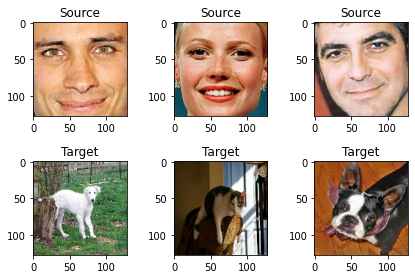

In [ ]:
### plotting sample of three of the source (celeb pics) and target (catsNdogs pics)
### side by side
fig, axs = plt.subplots(2, 3)
fig.tight_layout(pad=1.0)
for i in range(3):
  axs[0, i].imshow(celeb[i+10].astype('uint8'))
  axs[0, i].set_title('Source')
  axs[1, i].imshow(catsNdogs[i+10].astype('uint8'))
  axs[1, i].set_title('Target')

**Building the model**

The model was configured to save the weights every 5000 passes and output image samples every 5000. This allowed the best model to be selected from the saved weights by looking over the image samples. The images are saved in the folder /content/drive/MyDrive/ima.

In [7]:
# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_image = Input(shape=image_shape)
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	# define model
	model = Model(in_image, patch_out)
	# compile model
	model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])
	return model
 
# generator a resnet block
def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first layer convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# second convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	# concatenate merge channel-wise with input layer
	g = Concatenate()([g, input_layer])
	return g
 
# define the standalone generator model
def define_generator(image_shape, n_resnet=9):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# c7s1-64
	g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d128
	g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d256
	g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# R256
	for _ in range(n_resnet):
		g = resnet_block(256, g)
	# u128
	g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# u64
	g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# c7s1-3
	g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model
 
# define a composite model for updating generators by adversarial and cycle loss
def define_composite_model(g_model_1, d_model, g_model_2, image_shape, filepath='NULL'):
	# ensure the model we're updating is trainable
	g_model_1.trainable = True
	# mark discriminator as not trainable
	d_model.trainable = False
	# mark other generator model as not trainable
	g_model_2.trainable = False
	# discriminator element
	input_gen = Input(shape=image_shape)
	gen1_out = g_model_1(input_gen)
	output_d = d_model(gen1_out)
	# identity element
	input_id = Input(shape=image_shape)
	output_id = g_model_1(input_id)
	# forward cycle
	output_f = g_model_2(gen1_out)
	# backward cycle
	gen2_out = g_model_2(input_id)
	output_b = g_model_1(gen2_out)
	# define model graph
	model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
	# define optimization algorithm configuration
	opt = Adam(lr=0.0001, beta_1=0.5)
  ## loading in previous weights from crashed training run
	# compile model with weighting of least squares loss and L1 loss
	model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)
	if filepath != 'NULL':
		model.load_weights(filepath)
	return model
 
# load and prepare training images
def load_real_samples(filename):
	# load the dataset
	data = np.load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]
 
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = np.ones((n_samples, patch_shape, patch_shape, 1))
	return X, y
 
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, dataset, patch_shape):
	# generate fake instance
	X = g_model.predict(dataset)
	# create 'fake' class labels (0)
	y = np.zeros((len(X), patch_shape, patch_shape, 1))
	return X, y
 
# save the models to file
def save_weights(step, g_model_AtoB, g_model_BtoA, d_model_A, d_model_B, c_model_AtoB, c_model_BtoA):
	# save the first generator model
	filename1 = './g_model_AtoB_%06d.h5' % (step+1)
	g_model_AtoB.save_weights(filename1)
	# save the second generator model
	filename2 = './g_model_BtoA_%06d.h5' % (step+1)
	g_model_BtoA.save_weights(filename2)
 # save the first generator model
	filename1 = './d_model_A_%06d.h5' % (step+1)
	d_model_A.save_weights(filename1)
	# save the second generator model
	filename2 = './d_model_B_%06d.h5' % (step+1)
	d_model_B.save_weights(filename2)
 # save the first generator model
	filename1 = './c_model_AtoB_%06d.h5' % (step+1)
	c_model_AtoB.save_weights(filename1)
	# save the second generator model
	filename2 = './c_model_BtoA_%06d.h5' % (step+1)
	c_model_BtoA.save_weights(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))
 
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, trainX, name, n_samples=5):
	# select a sample of input images
	X_in, _ = generate_real_samples(trainX, n_samples, 0)
	# generate translated images
	X_out, _ = generate_fake_samples(g_model, X_in, 0)
	# scale all pixels from [-1,1] to [0,1]
	X_in = (X_in + 1) / 2.0
	X_out = (X_out + 1) / 2.0
	# plot real images
	for i in range(n_samples):
		plt.subplot(2, n_samples, 1 + i)
		plt.axis('off')
		plt.imshow(X_in[i])
	# plot translated image
	for i in range(n_samples):
		plt.subplot(2, n_samples, 1 + n_samples + i)
		plt.axis('off')
		plt.imshow(X_out[i])
	# save plot to file
	filename1 = '/content/drive/MyDrive/ima/%s_generated_plot_%06d.png' % (name, (step+1))
	plt.savefig(filename1)
	plt.close()
 
# update image pool for fake images
def update_image_pool(pool, images, max_size=50):
	selected = list()
	for image in images:
		if len(pool) < max_size:
			# stock the pool
			pool.append(image)
			selected.append(image)
		elif np.random.rand() < 0.5:
			# use image, but don't add it to the pool
			selected.append(image)
		else:
			# replace an existing image and use replaced image
			ix = randint(0, len(pool))
			selected.append(pool[ix])
			pool[ix] = image
	return np.asarray(selected)
 
# train cyclegan models
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset):
	# define properties of the training run
	n_epochs, n_batch, =2, 1
	# determine the output square shape of the discriminator
	n_patch = d_model_A.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# prepare image pool for fakes
	poolA, poolB = list(), list()
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)
		X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
		X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
		# update fakes from pool
		X_fakeA = update_image_pool(poolA, X_fakeA)
		X_fakeB = update_image_pool(poolB, X_fakeB)
		# update generator B->A via adversarial and cycle loss
		g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
		# update discriminator for A -> [real/fake]
		dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
		dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
		# update generator A->B via adversarial and cycle loss
		g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
		# update discriminator for B -> [real/fake]
		dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
		dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
		# summarize performance
		print('>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
		# evaluate the model performance every so often
		if (i+1) % 4998 == 0:
			# plot A->B translation
			summarize_performance(i, g_model_AtoB, trainA, 'AtoB')
			# plot B->A translation
			summarize_performance(i, g_model_BtoA, trainB, 'BtoA')
		if (i+1) % 4998 == 0:
			# save the models
			save_weights(i, g_model_AtoB, g_model_BtoA, d_model_A, d_model_B, c_model_AtoB, c_model_BtoA)
 

**Saving Model check-points**

The model defining functions are called below. We are passing the saved weights after every 2 epochs to make to process easy and fast.

In [8]:
# load image data
dataset = load_real_samples('/content/drive/MyDrive/cycgan/celeb_catsNdogs_128.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
g_model_AtoB.load_weights('/content/drive/MyDrive/New-weights/g_model_AtoB_009996.npz') #used to load weights from drive and continue training
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
g_model_BtoA.load_weights('/content/drive/MyDrive/New-weights/g_model_BtoA_009996.npz')
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
d_model_A.load_weights('/content/drive/MyDrive/New-weights/d_model_A_009996.npz')
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
d_model_B.load_weights('/content/drive/MyDrive/New-weights/d_model_B_009996.npz')
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
c_model_AtoB.load_weights('/content/drive/MyDrive/New-weights/c_model_AtoB_009996.h5')
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)
c_model_BtoA.load_weights('/content/drive/MyDrive/New-weights/c_model_BtoA_009996.npz')

Loaded (10000, 128, 128, 3) (12500, 128, 128, 3)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Training model**

In [9]:
# train models
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset)

Streaming output truncated to the last 5000 lines.
>15002, dA[0.267,0.003] dB[0.018,0.019] g[4.628,3.772]
>15003, dA[0.005,0.025] dB[0.089,0.099] g[3.514,4.366]
>15004, dA[0.083,0.010] dB[0.067,0.028] g[5.703,5.317]
>15005, dA[0.009,0.052] dB[0.004,0.032] g[4.263,3.786]
>15006, dA[0.005,0.013] dB[0.039,0.007] g[6.342,7.521]
>15007, dA[0.002,0.003] dB[0.003,0.005] g[6.823,6.256]
>15008, dA[0.003,0.003] dB[0.095,0.027] g[3.251,3.850]
>15009, dA[0.001,0.003] dB[0.006,0.099] g[3.123,3.692]
>15010, dA[0.006,0.003] dB[0.003,0.010] g[4.460,4.748]
>15011, dA[0.002,0.004] dB[0.300,0.006] g[3.452,3.844]
>15012, dA[0.002,0.004] dB[0.006,0.008] g[3.958,5.024]
>15013, dA[0.004,0.005] dB[0.154,0.003] g[5.619,6.833]
>15014, dA[0.030,0.003] dB[0.005,0.376] g[2.728,4.129]
>15015, dA[0.003,0.005] dB[0.003,0.011] g[4.507,4.739]
>15016, dA[0.001,0.001] dB[0.040,0.008] g[3.907,4.176]
>15017, dA[0.001,0.002] dB[0.004,0.265] g[4.704,4.331]
>15018, dA[0.002,0.018] dB[0.048,0.008] g[3.301,3.768]
>15019, dA[0.0

**Copying the saved wieghts after every 2 epochs into the drive**

In [10]:
shutil.copy("/content/c_model_AtoB_019992.h5", "/content/drive/MyDrive/Final-weights/c_model_AtoB_019992.h5")
shutil.copy("/content/c_model_BtoA_019992.h5", "/content/drive/MyDrive/Final-weights/c_model_BtoA_019992.npz")
shutil.copy("/content/d_model_A_019992.h5", "/content/drive/MyDrive/Final-weights/d_model_A_019992.npz")
shutil.copy("/content/d_model_B_019992.h5", "/content/drive/MyDrive/Final-weights/d_model_B_019992.npz")
shutil.copy("/content/g_model_AtoB_019992.h5", "/content/drive/MyDrive/Final-weights/g_model_AtoB_019992.npz" )
shutil.copy("/content/g_model_BtoA_019992.h5", "/content/drive/MyDrive/Final-weights/g_model_BtoA_019992.npz" )



'/content/drive/MyDrive/Final-weights/g_model_BtoA_019992.npz'

**Testing**

In [12]:
!unzip "/content/Test_Images.zip"

Archive:  /content/Test_Images.zip
  inflating: Test_Images/10.jpg      
  inflating: Test_Images/11.jpg      
  inflating: Test_Images/8.jpg       
  inflating: Test_Images/Image-1.jpg  
  inflating: Test_Images/Image-2.jpg  
  inflating: Test_Images/Image-3.jpg  


In [14]:
# Processing test images and generating fakes, plotting the results

image_shape = (128, 128, 3)
# loading test images
def load_image(filename, size=(128,128)):
	# load and resize the image
	pixels = load_img(filename, target_size=size)
	# convert to numpy array
	pixels = img_to_array(pixels)
	# transform in a sample
	pixels = np.expand_dims(pixels, 0)
	# scale from [0,255] to [-1,1]
	pixels = (pixels - 127.5) / 127.5
	return pixels

#utilising function above to load in test images
def generate_catsNdogs(filepath, direction='AB'):
  filepath_test = filepath
  test_list = list()
  for file in os.listdir(filepath_test):
    pic = os.fsdecode(file)
    pic = os.path.join(filepath_test, file)
    pic = load_image(pic)
    test_list.append(pic)

  # Loading weights and creating fake anime image based on test images
  cust = {'InstanceNormalization': InstanceNormalization}
  g_model_AtoB = define_generator(image_shape)
  g_model_BtoA = define_generator(image_shape)
  g_model_AtoB.load_weights('/content/g_model_AtoB_019992.h5')
  g_model_BtoA.load_weights('/content/g_model_BtoA_019992.h5')

  # translate image
  image_transAB = list()
  for i in range(len(os.listdir(filepath_test))):
    image_transAB.append(g_model_AtoB.predict(test_list[i])) 
    # scale from [-1,1] to [0,1]
    image_transAB[i] = (image_transAB[i] + 1) / 2
    test_list[i] = (test_list[i] + 1) / 2

  image_transBA = list()
  for i in range(len(os.listdir(filepath_test))):
    image_transBA.append(g_model_BtoA.predict(image_transAB[i])) 
    # scale from [-1,1] to [0,1]
    image_transBA[i] = (image_transBA[i] + 1) / 2
  
  if direction=='AB':
    #plotting resultsA-B
    for i in range(len(os.listdir(filepath_test))):
      fig = plt.figure()
      ax1 = fig.add_subplot(2,2,1)
      ax1.set_title('Source')
      ax1.imshow(test_list[i][0])
      ax2 = fig.add_subplot(2,2,2)
      ax2.set_title('Generated')
      ax2.imshow(image_transAB[i][0])

  else:
        #plotting results B-A
    for i in range(len(os.listdir(filepath_test))):
      fig = plt.figure()
      ax3 = fig.add_subplot(2,2,3)
      ax3.set_title('Source')
      ax3.imshow(image_transAB[i][0])
      ax4 = fig.add_subplot(2,2,4)
      ax4.set_title('Generated')
      ax4.imshow(image_transBA[i][0])

  plt.show()

#utilising function above to load in test images
def generate_human(filepath, direction='AB'):
  filepath_test = filepath
  test_list = list()
  for file in os.listdir(filepath_test):
    pic = os.fsdecode(file)
    pic = os.path.join(filepath_test, file)
    pic = load_image(pic)
    test_list.append(pic)

  # Loading weights and creating fake anime image based on test images
  cust = {'InstanceNormalization': InstanceNormalization}
  g_model_AtoB = define_generator(image_shape)
  g_model_BtoA = define_generator(image_shape)
  g_model_AtoB.load_weights('/content/c_model_AtoB_019992.h5')
  g_model_BtoA.load_weights('/content/c_model_BtoA_019992.h5')

  # translate image
  image_transAB = list()
  for i in range(len(os.listdir(filepath_test))):
    image_transAB.append(g_model_AtoB.predict(test_list[i])) 
    # scale from [-1,1] to [0,1]
    image_transAB[i] = (image_transAB[i] + 1) / 2
    test_list[i] = (test_list[i] + 1) / 2

  image_transBA = list()
  for i in range(len(os.listdir(filepath_test))):
    image_transBA.append(g_model_BtoA.predict(image_transAB[i])) 
    # scale from [-1,1] to [0,1]
    image_transBA[i] = (image_transBA[i] + 1) / 2
  
  if direction=='AB':
    #plotting resultsA-B
    for i in range(len(os.listdir(filepath_test))):
      fig = plt.figure()
      ax1 = fig.add_subplot(2,2,1)
      ax1.set_title('Source')
      ax1.imshow(test_list[i][0])
      ax2 = fig.add_subplot(2,2,2)
      ax2.set_title('Generated')
      ax2.imshow(image_transAB[i][0])

  else:
        #plotting results B-A
    for i in range(len(os.listdir(filepath_test))):
      fig = plt.figure()
      ax3 = fig.add_subplot(2,2,3)
      ax3.set_title('Source')
      ax3.imshow(image_transAB[i][0])
      ax4 = fig.add_subplot(2,2,4)
      ax4.set_title('Generated')
      ax4.imshow(image_transBA[i][0])

  plt.show()

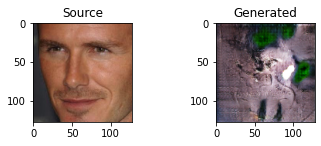

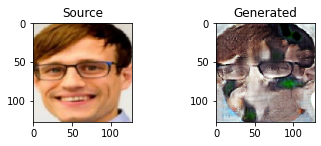

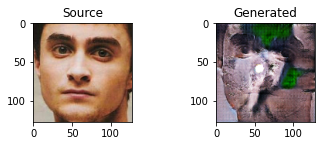

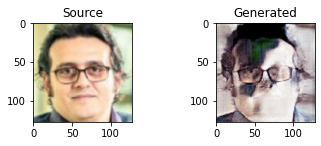

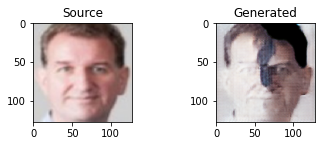

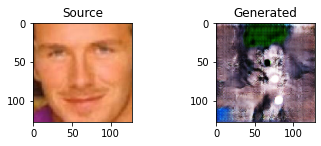

In [16]:
#Generating catsNdogs faces from test-Images
generate_catsNdogs('/content/Test_Images', direction='AB')

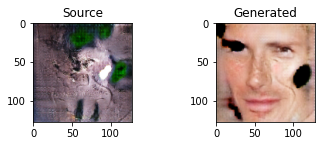

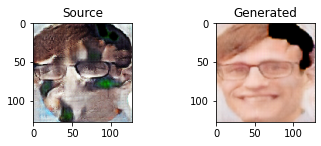

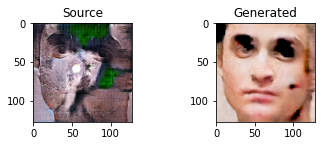

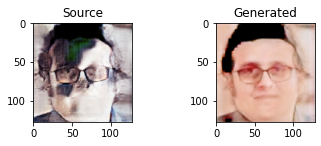

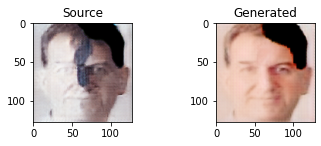

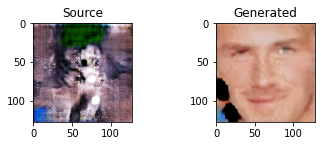

In [17]:
# Attempting to translate back to human
generate_catsNdogs('/content/Test_Images', direction='BA')